In [1]:
from RCIRL import RCIRL
import numpy as np
% matplotlib inline

y = RCIRL([])
y.s0()

(array([ 0.,  0.,  0.,  0.,  0.]), True, array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

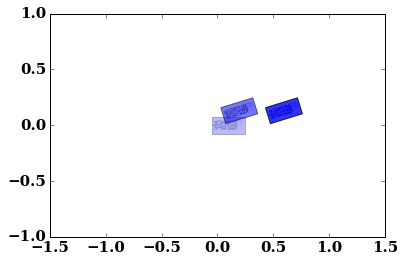

In [6]:
y.visualize_trajectory()

In [ ]:
traj = [(0.073894947640972958, -0.16239925433149047, -0.30247932146303796), 
        (0.53712788399618117, -0.81607849894710394, 0.16573800050712573), 
        (-0.54448351512128323, 0.98204320760553687, -0.60619766826558374), 
        (-0.11540549743043645, 0.23171823981663686, 1.3446808145658031), 
        (-0.69000505432048487, 0.86933310921978879, -1.9019581028207819), 
        (0.92077006389405747, -1.3635215404400574, -0.93758205728291999), 
        (-0.23866226339737637, -0.32147407222288238, -0.70742529860626358),
        (-0.001430526717396243, 0.28111010507135326, 2.4995225939898167), 
        (-0.92559503545461408, 1.8783433943336179, -0.11508573282170742)]

# n is length of trajectory
y.visualize_trajectory(traj[-5:], alphafn= lambda i, n: (0.7 * np.exp(-(n- 2 - i))) if i < n - 1 else 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib.cbook as cbook

N = 7
x = np.linspace(0, 1, N)
y = x**1.1
heading = np.linspace(10, 90, N)
trajectory = zip(x, y, heading)

def get_image():
    fn = "prius.png" # cbook.get_sample_data("necked_tensile_specimen.png")
    arr = plt.imread(fn)
    # make background transparent
    # you won't have to do this if your car image already has a transparent background
    mask = (arr == (1,1,1,1)).all(axis=-1)
    arr[mask] = 0
    return arr

def imshow_affine(ax, z, *args, **kwargs):
    im = ax.imshow(z, *args, **kwargs)
    x1, x2, y1, y2 = im.get_extent()
    im._image_skew_coordinate = (x2, y1)
    return im

length, width = 0.3, 0.15
car = get_image()
fig, ax = plt.subplots()
for i, t in enumerate(trajectory, start=1):
    xi, yi, deg = t
    im = imshow_affine(ax, car, interpolation='none',
                       extent=[0, length, 0, width], clip_on=True,
                       alpha=0.8*i/len(trajectory))
    center_x, center_y = length//2, width//2
    im_trans = (mtransforms.Affine2D()
                .rotate_deg_around(center_x, center_y, deg)
                .translate(xi, yi)
                + ax.transData)
    im.set_transform(im_trans)

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.7)
plt.show()